<a href="https://colab.research.google.com/github/uscudum/IA-ML-RL-HousingData/blob/main/Introducci%C3%B3n_RL_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la regresión lineal

## Carga y visualización de datos con Pandas

Para trabajar con un archivo CSV en Python utilizando **Pandas**, seguimos tres pasos básicos.  
Primero, importamos la librería `pandas` con el alias `pd`, lo que nos permitirá manejar estructuras de datos como los **DataFrame**.  
Luego, cargamos el archivo `HousingData.csv` utilizando la función `pd.read_csv()`, almacenando la información en la variable `df`.  
Finalmente, usamos `df.head(5)` para imprimir las primeras cinco filas del conjunto de datos, lo que nos da una vista rápida de su estructura y contenido.


In [14]:
import pandas as pd
df = pd.read_csv('HousingData.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Visualización de relaciones entre variables con Seaborn

En este ejemplo vamos a generar gráficos para analizar las relaciones entre varias columnas de un dataset.  
Primero, importamos las librerías necesarias: **Seaborn**, que facilita la creación de gráficos estadísticos, y **Matplotlib**, que nos permite mostrar las gráficas.  
Luego, definimos una lista llamada `cols` que contiene los nombres de las columnas que queremos visualizar (`CRIM`, `PTRATIO`, `RM`, `MEDV`).  
Con la función `sns.pairplot()` de Seaborn creamos una matriz de gráficos de dispersión y distribuciones para todas las combinaciones posibles de esas columnas.  
Finalmente, utilizamos `plt.show()` para mostrar los gráficos en pantalla.


import seaborn as sns
import matplotlib.pyplot as plt

```
import seaborn as sns
import matplotlib.pyplot as plt
```



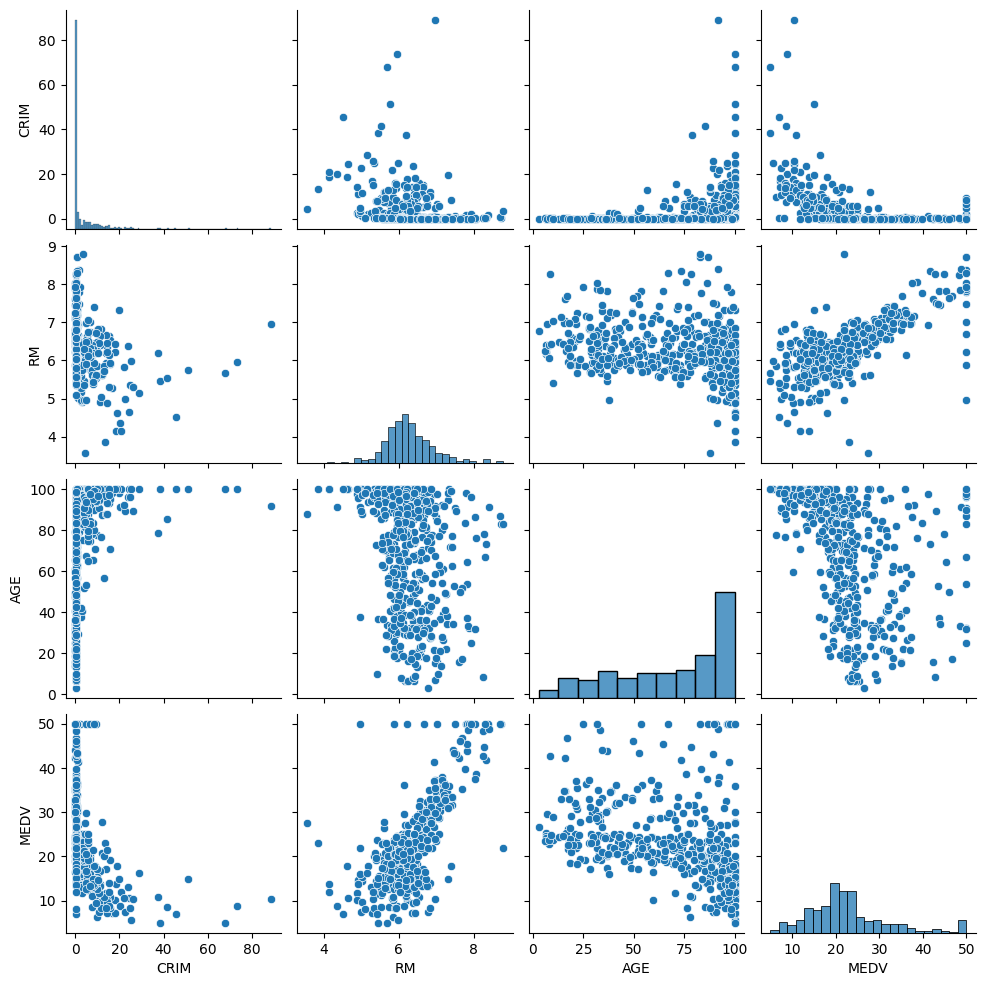

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['CRIM','RM','AGE','MEDV']
sns.pairplot(df[cols])
plt.show()


## Analizando correlaciones entre variables

Una vez que observamos cómo están correlacionadas las variables de manera visual, también es importante apoyarnos en un método numérico que nos permita entender mejor esas relaciones.

Para esto podemos utilizar el método `.corr()` de **Pandas**, que calcula la **matriz de correlación** entre las columnas seleccionadas, y luego representarla gráficamente con la función **[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)** de *Seaborn*.  



1. Selecciona las columnas de interés en tu DataFrame (`df[cols]`).  
2. Aplica el método `.corr()` para obtener la matriz de correlación.  
3. Utiliza `sns.heatmap()` para graficar esa matriz en forma de mapa de calor.  
   - `annot=True` permite mostrar los valores numéricos dentro de cada celda.  

<Axes: >

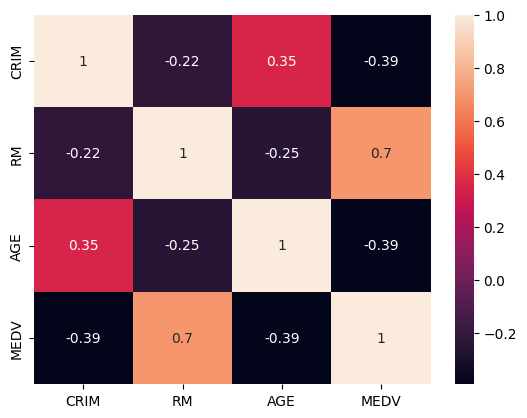

In [16]:
sns.heatmap(df[cols].corr(), annot=True)

## Creación y ajuste de un modelo de Regresión Lineal con Scikit-learn

En este ejemplo vamos a construir un modelo de **Regresión Lineal** utilizando la librería **Scikit-learn**.  
Primero importamos las clases necesarias: `StandardScaler` para estandarizar los datos y `LinearRegression` para crear el modelo.  
Luego separamos nuestras variables:  
- `X` será la variable independiente (en este caso, el número medio de habitaciones por vivienda `RM`).  
- `Y` será la variable dependiente (el valor medio de las viviendas `MEDV`).  

A continuación, aplicamos el escalado con `StandardScaler`, que transforma los datos para que tengan media 0 y desviación estándar 1, lo cual mejora la estabilidad del modelo.  
Después, creamos una instancia de `LinearRegression` y la entrenamos con la función `fit()`, pasando como argumentos las versiones estandarizadas de `X` y `Y`.

```python
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Separamos las variables dependientes e independientes
X = df['RM'].values.reshape(-1,1)
Y = df['MEDV'].values.reshape(-1,1)

# Estandarizamos los valores
ss_x = StandardScaler()
ss_y = StandardScaler()

X_ss = ss_x.fit_transform(X)
Y_ss = ss_y.fit_transform(Y)


# Creamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_ss, Y_ss)

LinearRegression()

In [33]:
import numpy as np

# Ingresamos una entrada de ejemplo y la estandarizamos
num_hab = 10
num_hab_std = ss_x.transform([[num_hab]])

result_std = lr.predict(num_hab_std)
result = ss_y.inverse_transform(result_std)

# Predecimos el resultado y lo des-estandarizamos
print( num_hab, "habitaciones se traducen a US$ ",  round(result[0][0] * 1000 , 2), "aprox")


10 habitaciones se traducen a US$  56350.47 aprox
